In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, precision_score, recall_score

In [2]:
col_names =['Engine_ID','Cycles','Condition_1','Condition_2','Condition_3','T2','T24','T30','T50','P2','P15','P30','Nf','Nc','epr','Ps30','phi','NRf','NRc','BPR','farB','htBleed','Nf_dmd',
        'PCNfR_dmd','W31','W32']
Rul_names = ['RUL']

In [3]:
train= pd.read_csv('train_FD001.txt',sep=' ',header=None,names=col_names,usecols=range(0,26))
test= pd.read_csv('test_FD001.txt',sep=' ',header=None,names=col_names,usecols=range(0,26))
RUL= pd.read_csv('RUL_FD001.txt',sep=' ',header=None,usecols=range(0,1),names=Rul_names)
RUL['Engine_ID']=RUL.index+1

In [4]:
display(RUL.describe().T)

,count,mean,std,min,25%,50%,75%,max
RUL,100.0,75.52,41.764970,7.0,32.75,86.0,112.25,145.0
Engine_ID,100.0,50.50,29.011492,1.0,25.75,50.5,75.25,100.0


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine_ID,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
Cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
Condition_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
Condition_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
Condition_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
T2,20631.0,518.670000,6.537152e-11,518.6700,518.6700,518.6700,518.6700,518.6700
T24,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
T30,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
T50,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
P2,20631.0,14.620000,3.394700e-12,14.6200,14.6200,14.6200,14.6200,14.6200


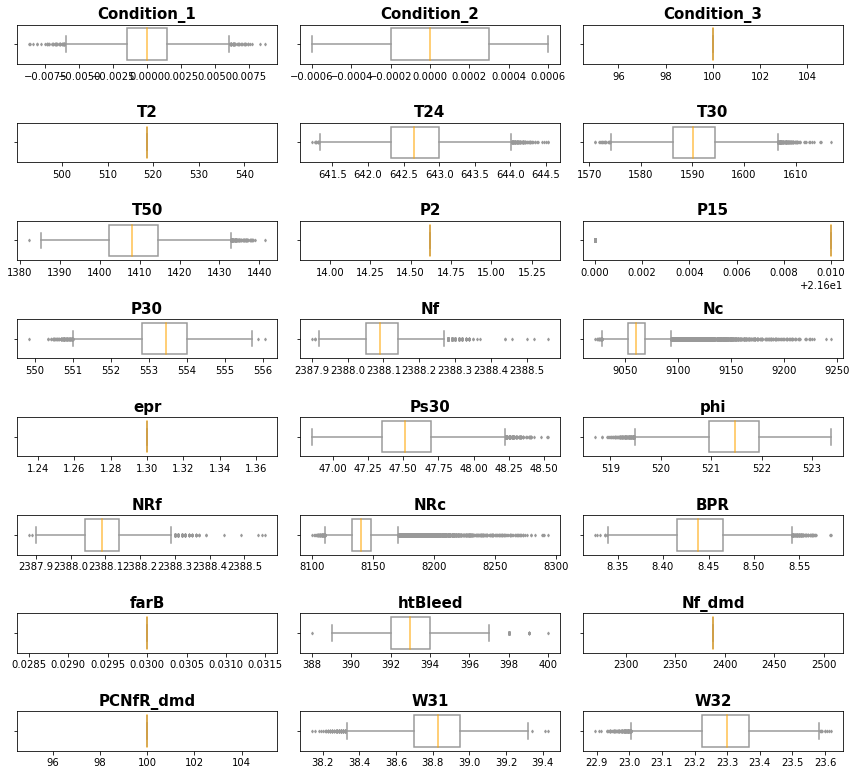

In [6]:
plt.figure(figsize=(12,12))
const_columns ={'Engine_ID','Cycles'}
Title_names=col_names[:]
for k in const_columns :
    Title_names.remove(k)
for i in range(len(train.drop(columns=const_columns).columns)):
    temp_data = train.drop(columns=const_columns).iloc[:,i]
    plt.subplot(9,3,i+1)
    warnings.filterwarnings('ignore')
    ax=sns.boxplot(temp_data,color='white',medianprops=dict(color="orange", alpha=0.7),
                  fliersize=2)
    plt.title(Title_names[i],size=15,fontweight='bold')
    plt.tight_layout()
    ax.set_xlabel('')
plt.show

plt.savefig('.\Data_distribution.png',bbox_inches ='tight')

In [7]:
cols_drop={'Engine_ID','Cycles','Condition_3','T2','P2','P15','epr','farB','Nf_dmd','PCNfR_dmd'}
new_names=col_names[:]
for k in cols_drop :
    new_names.remove(k)

<function matplotlib.pyplot.show(close=None, block=None)>

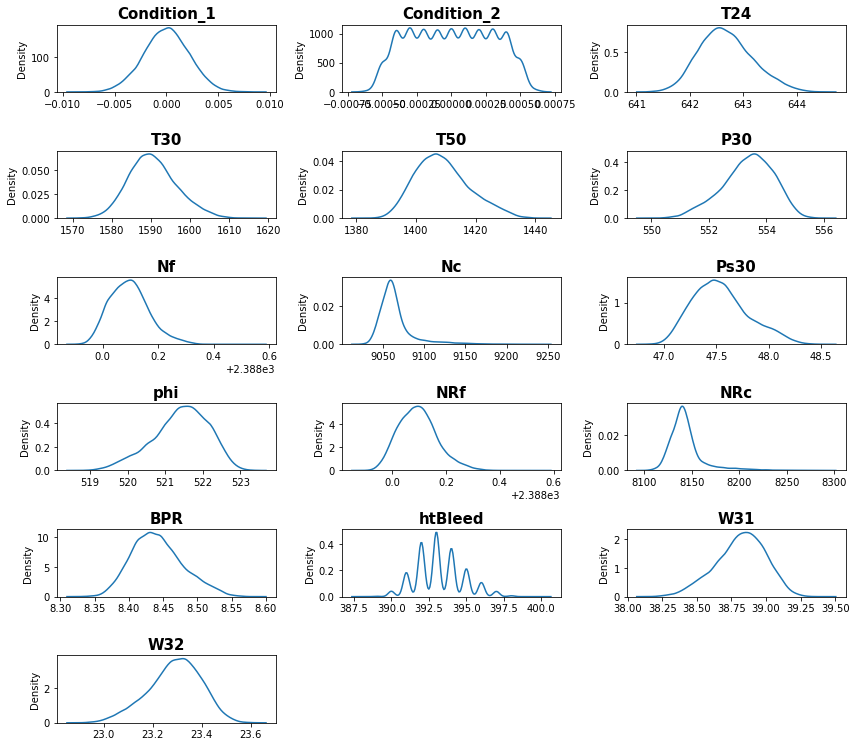

In [8]:
plt.figure(figsize=(12,12))
for j in range(len(train.drop(columns=cols_drop).columns)):
    temp_data = train.drop(columns=cols_drop).iloc[:,j]
    plt.subplot(7,3,j+1)
    warnings.filterwarnings('ignore')
    ax=sns.kdeplot(temp_data,legend=False)
    plt.title(new_names[j],size=15,fontweight='bold')
    plt.tight_layout()
    ax.set_xlabel('')
plt.show

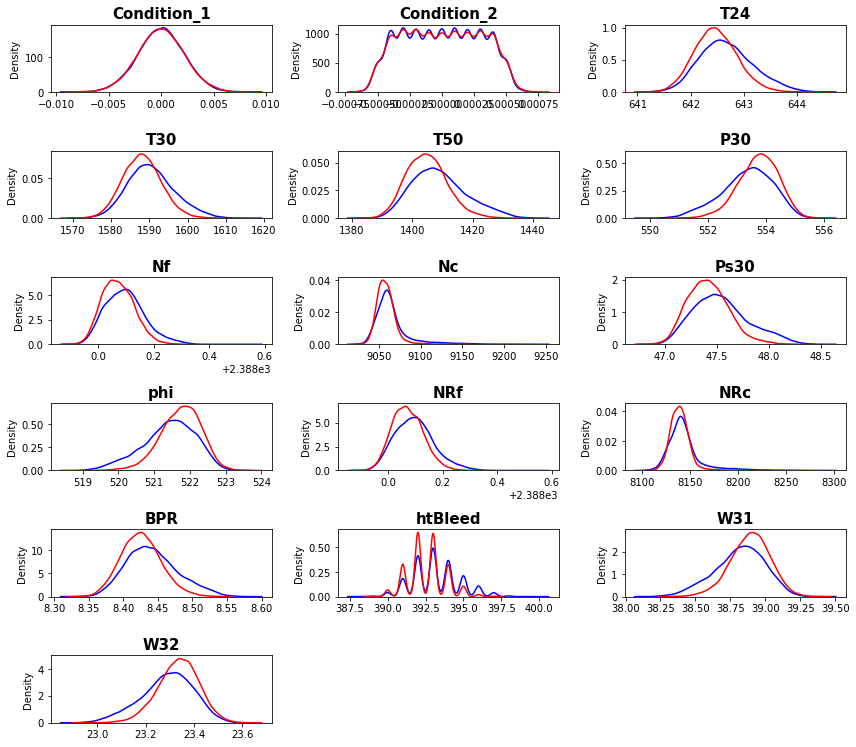

In [9]:
plt.figure(figsize=(12,12))
for j in range(len(train.drop(columns=cols_drop).columns)):
    temp_data_train = train.drop(columns=cols_drop).iloc[:,j]
    temp_data_test = test.drop(columns=cols_drop).iloc[:,j]
    plt.subplot(7,3,j+1)
    warnings.filterwarnings('ignore')
    ax=sns.kdeplot(temp_data_train,legend=True,color='blue',label='Train')
    ax=sns.kdeplot(temp_data_test,legend=True,color='red',label='Test')
    plt.title(new_names[j],size=15,fontweight='bold')
    plt.tight_layout()
    ax.set_xlabel('')
plt.show

plt.savefig('Desnityplot of train and test data.png',bbox_inches ='tight')

In [10]:
#compute and add RUL for Training data
train_cycles_failure = pd.DataFrame(train.groupby('Engine_ID')['Cycles'].max()).reset_index().rename(columns={
    'Cycles':'MAX_cycles'})

train=train.merge(train_cycles_failure,on='Engine_ID',how='left')
train['RUL']= train['MAX_cycles']-train['Cycles']
train

,Engine_ID,Cycles,Condition_1,Condition_2,Condition_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,MAX_cycles,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


In [11]:
#Compute and add RUL for test Data
test_cycles_failure = pd.DataFrame(test.groupby('Engine_ID')['Cycles'].max()).reset_index().rename(columns={
    'Cycles':'MAX_cycles'})
test_cycles_failure['MAX_cycles']=test_cycles_failure['MAX_cycles'] + RUL['RUL']
test=test.merge(test_cycles_failure,on='Engine_ID',how='left')
test['RUL']= test['MAX_cycles'] - test['Cycles']
test

,Engine_ID,Cycles,Condition_1,Condition_2,Condition_3,T2,T24,T30,T50,P2,...,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,MAX_cycles,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,143,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,218,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,218,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,218,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,218,21


In [12]:
print(train.loc[train['Cycles'].idxmax()])

Engine_ID        69.0000
Cycles          362.0000
Condition_1       0.0007
Condition_2      -0.0000
Condition_3     100.0000
T2              518.6700
T24             643.7500
T30            1598.1600
T50            1428.2800
P2               14.6200
P15              21.6100
P30             551.5500
Nf             2388.3100
Nc             9054.1900
epr               1.3000
Ps30             48.0200
phi             519.1200
NRf            2388.3300
NRc            8124.2700
BPR               8.5126
farB              0.0300
htBleed         397.0000
Nf_dmd         2388.0000
PCNfR_dmd       100.0000
W31              38.4200
W32              22.9782
MAX_cycles      362.0000
RUL               0.0000
Name: 13992, dtype: float64


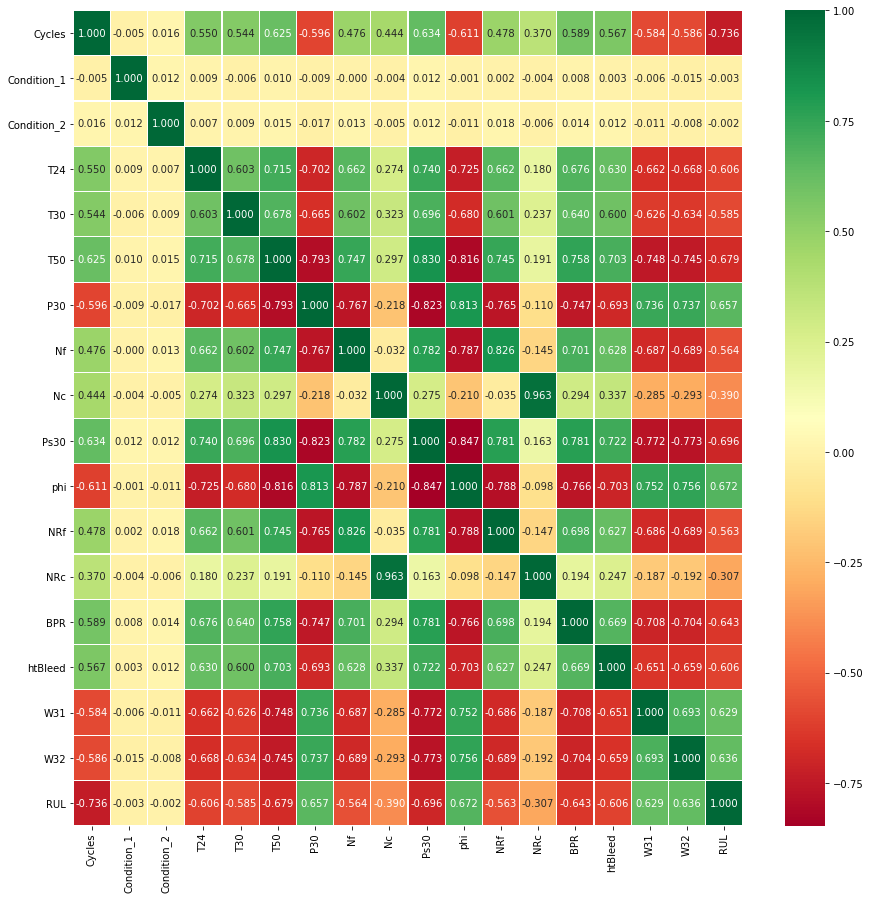

In [13]:
#correlation heatmap
plt.figure(figsize=(15,15))
cols_drop={'MAX_cycles','Engine_ID','Condition_3','T2','P15','epr',
                                        'P2','farB','Nf_dmd','PCNfR_dmd'}
sns.heatmap(train.drop(columns=cols_drop).corr(),annot=True,cmap='RdYlGn',linewidths=0.2,fmt = ".3f")
plt.savefig('heatmap.png',bbox_inches ='tight')

In [14]:
#preparing laels for training set
train['Percent'] = train['RUL'] /train['MAX_cycles']

In [15]:
#preparing laels for test set
test['Percent'] = test['RUL']/test['MAX_cycles']

In [16]:
#split and prepare training data
Selected_features=list(train)
features_drop = {'Engine_ID','Cycles','Condition_1','Condition_2','Condition_3','T2','P2','P15','epr','farB','Nf_dmd','PCNfR_dmd','MAX_cycles','RUL','Percent'}
for k in features_drop :
    Selected_features.remove(k)

X_train = train[Selected_features]
scaler = preprocessing.MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=Selected_features, index=X_train.index)
X_test = test[Selected_features]
X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=Selected_features, index=X_test.index)

In [17]:
#Perform PCA
n_components = 14
pca = PCA(n_components=n_components, svd_solver= 'full')

In [18]:
#PCA on Test Data
train_scaled_PCA = pca.fit_transform(X_train)
train_scaled_PCA = pd.DataFrame(train_scaled_PCA)
train_scaled_PCA

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.408214,-0.049395,0.150148,-0.061279,-0.044195,-0.038951,0.066256,0.060166,-0.017955,0.105894,-0.064563,-0.028284,-0.043157,0.034655
1,-0.333224,-0.071043,0.086665,-0.110509,-0.070525,-0.011815,0.068919,0.007862,-0.005490,-0.063835,-0.101324,-0.037601,0.033476,0.016184
2,-0.419914,-0.050533,-0.006488,-0.061089,0.074232,0.143415,0.057661,0.002896,0.070484,-0.065795,-0.018395,0.029522,-0.048700,-0.006967
3,-0.519634,-0.076855,-0.059496,0.028682,0.043152,0.011954,-0.165567,-0.041508,0.097132,-0.109502,-0.013291,0.141710,-0.022661,0.005773
4,-0.345397,-0.032438,-0.029594,0.080185,-0.093924,-0.030207,0.005869,-0.026388,0.070517,-0.058139,0.018767,-0.008573,-0.019471,-0.010999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.986107,-0.093368,0.031224,0.105554,0.126082,-0.088293,-0.069054,0.017728,0.004020,0.034447,0.067703,-0.066419,0.067011,-0.002791
20627,1.004294,-0.104781,0.053745,-0.073684,-0.121278,0.135041,-0.060823,0.051804,0.007220,-0.077341,0.094054,-0.068996,-0.014727,-0.006204
20628,1.128876,-0.053408,0.120647,0.101056,0.077092,-0.110574,0.091983,-0.168635,0.003432,-0.099717,0.036371,-0.064582,-0.003148,0.010345
20629,1.108117,-0.085207,0.173104,-0.008939,-0.038859,0.150188,0.013000,-0.006855,-0.119538,-0.030353,-0.087023,-0.073238,-0.024435,-0.020807


[0.696 0.083 0.031 0.029 0.026 0.024 0.023 0.021 0.017 0.016 0.014 0.01
 0.008 0.001]


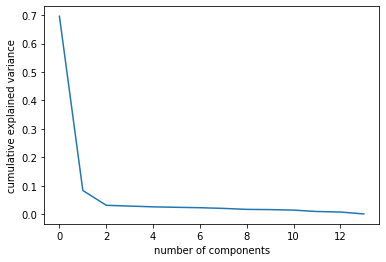

In [19]:
#variance captured by PCs
np.set_printoptions(precision=3, suppress=True)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.savefig('PCA_expalined_variance.png',bbox_inches ='tight')

In [20]:
#feature importances in each principal component
#PC1 is in row 0 and PC2 is in row 1 and so on
pd.DataFrame(pca.components_,columns=Selected_features)

,T24,T30,T50,P30,Nf,Nc,Ps30,phi,NRf,NRc,BPR,htBleed,W31,W32
0,0.294266,0.245837,0.326348,-0.302457,0.213624,0.073008,0.351069,-0.342075,0.209715,0.044960,0.294759,0.245038,-0.281492,-0.302642
1,0.035851,0.124649,0.017247,0.081773,-0.261924,0.627425,-0.027384,0.110170,-0.258671,0.645596,0.036778,0.114940,-0.030525,-0.042892
2,-0.914819,0.339249,0.061376,-0.074802,0.024287,-0.000945,0.041263,-0.053763,0.022243,-0.004043,0.077184,0.061764,-0.095634,-0.118492
3,-0.236931,-0.878166,0.062890,-0.043277,-0.004816,0.064704,0.053476,-0.028439,-0.003990,0.060818,0.144119,0.180558,-0.191065,-0.255716
4,0.058118,0.074199,-0.100990,0.059726,-0.017490,-0.016143,-0.043223,0.044273,-0.011966,-0.018055,-0.278571,-0.224376,0.266041,-0.879638
5,0.006933,-0.018308,0.048211,0.027482,-0.027745,0.044430,0.031607,-0.000915,-0.029495,0.045919,0.106451,-0.814770,-0.560916,-0.002687
6,-0.020344,-0.033311,-0.001579,0.018916,0.001219,0.017424,-0.010375,-0.016503,-0.006384,0.016617,0.789163,-0.271326,0.548063,-0.018559
7,-0.103226,-0.162734,0.500314,-0.247132,0.011865,0.122699,0.231767,-0.307240,0.013258,0.118170,-0.403395,-0.299227,0.423706,0.205511
8,0.018067,0.041952,0.722876,0.606946,0.019325,-0.081085,-0.154228,0.231922,0.018279,-0.081365,0.051755,0.082096,-0.042462,-0.065447
9,-0.030746,-0.014341,-0.254101,0.631304,-0.027416,0.026013,0.177314,-0.707509,-0.003766,0.022894,-0.026554,0.013028,0.001707,0.029726


In [21]:
#Add labels to training PCA data 
columns = ["PC{}".format(i+1)  for i in range(len(train_scaled_PCA.columns))]
train_scaled_PCA.columns=columns
train_scaled_PCA['Percent']=train['Percent']

In [22]:
#Add labels to test PCA data 
test_scaled_PCA = pca.transform(X_test)
test_scaled_PCA = pd.DataFrame(test_scaled_PCA)

columns = ["PC{}".format(i+1)  for i in range(len(test_scaled_PCA.columns))]
test_scaled_PCA.columns=columns
test_scaled_PCA['Percent'] = test['Percent']

In [23]:
print(np.percentile(train.Percent,20))

0.19727891156462585


In [24]:
#Add maintenance label to the testing and training data based Percent value
Y_train = pd.DataFrame(train['Percent'])
Y_test = pd.DataFrame(test['Percent'])
Y_train['Label'] = [1 if i <0.2 else 0 for i in Y_train['Percent']]
Y_test['Label'] = [1 if i <0.2 else 0 for i in Y_test['Percent']]

In [25]:
#randomaly select engine 55 to see the labels on it's distribution 
Engine_ID_55 = train.loc[(13992-361):13992,]
Engine_ID_55['Label'] = Y_train['Label']
cols_drop={'MAX_cycles','Engine_ID','Condition_3','T2','P15','epr',
                                        'P2','farB','Nf_dmd','PCNfR_dmd','Cycles','Percent'}
Engine_ID_55=Engine_ID_55.drop(columns=cols_drop).melt(
    id_vars=['RUL','Label'],var_name='Sensors',value_name='Value')
Engine_ID_55

,RUL,Label,Sensors,Value
0,361,0,Condition_1,-0.0014
1,360,0,Condition_1,-0.0003
2,359,0,Condition_1,0.0006
3,358,0,Condition_1,-0.0001
4,357,0,Condition_1,0.0026
...,...,...,...,...
5787,4,1,W32,23.0549
5788,3,1,W32,23.0610
5789,2,1,W32,23.0422
5790,1,1,W32,23.1208


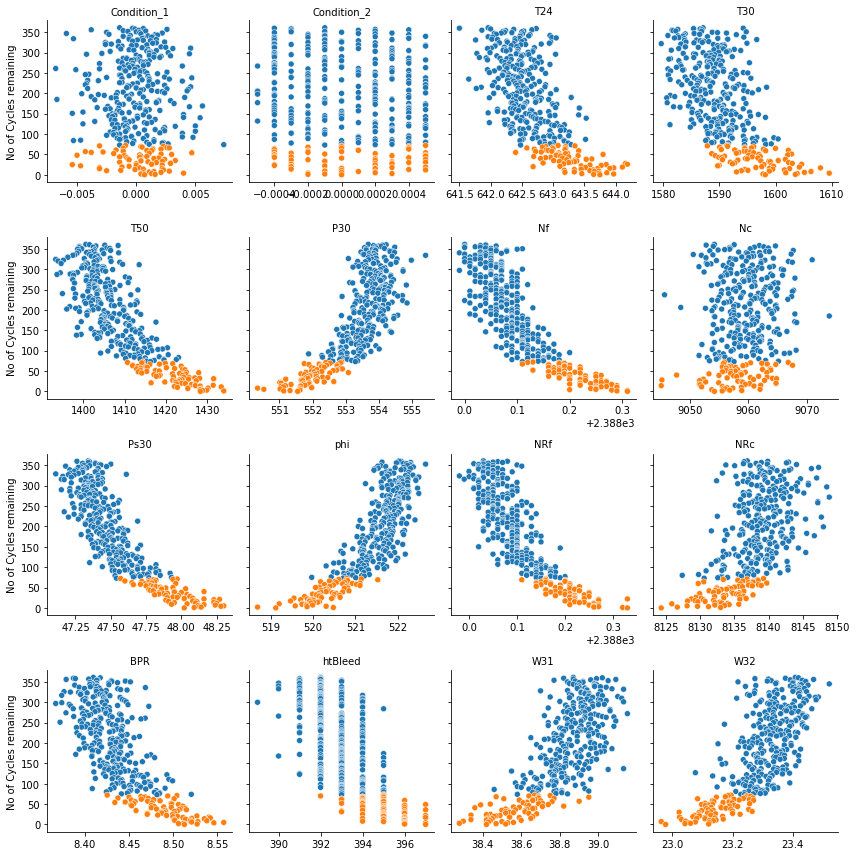

In [26]:
g=sns.FacetGrid(data=Engine_ID_55,col='Sensors',col_wrap=4,sharey=True,sharex=False)
g.map_dataframe(sns.scatterplot,x='Value',y='RUL',hue='Label')
g.set_titles("{col_name}") 
g.set_axis_labels(y_var='No of Cycles remaining')
g.tight_layout()
plt.savefig('Engine_55_values.png',bbox_inches ='tight')

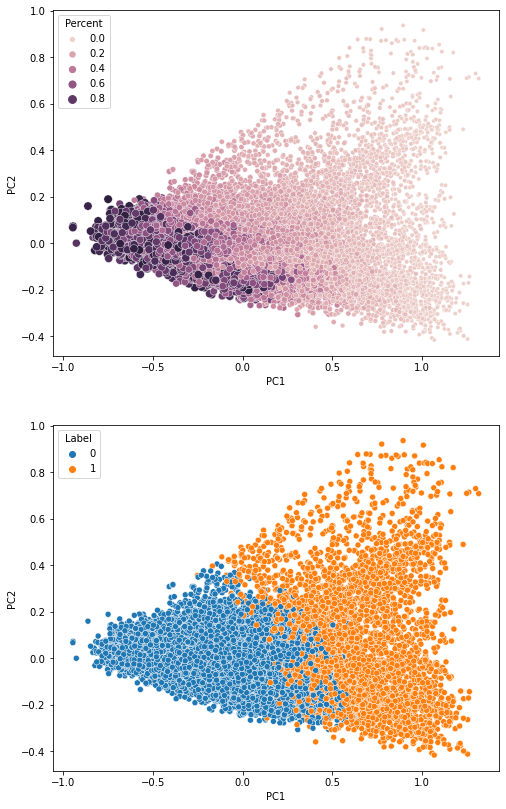

In [27]:
#PCA plot on Training Data
fig = plt.figure(figsize = (8,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
plt.subplot(211)
sns.scatterplot(data=train_scaled_PCA,x='PC1',y='PC2',hue=Y_train['Percent'],size=Y_train['Percent'])
plt.subplot(212)
sns.scatterplot(data=train_scaled_PCA,x='PC1',y='PC2',hue=Y_train['Label'])
ax.grid()
plt.savefig('PCA_training_data.png',bbox_inches ='tight')

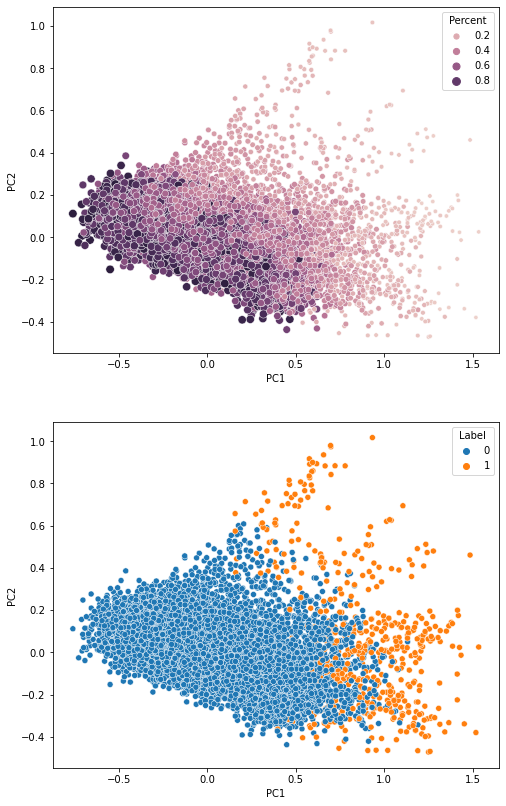

In [28]:
#PCA plot on test Data
fig = plt.figure(figsize = (8,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two component PCA', fontsize = 20)
plt.subplot(211)
sns.scatterplot(data=test_scaled_PCA,x='PC1',y='PC2',hue=Y_test['Percent'],size=Y_test['Percent'])
plt.subplot(212)
sns.scatterplot(data=test_scaled_PCA,x='PC1',y='PC2',hue=Y_test['Label'])
ax.grid()
plt.savefig('PCA_testing_data.png',bbox_inches ='tight')

In [29]:
def print_results(Model,Features,Actual,multi_class=False) :
    Prediction = Model.predict(Features)
    print('Accuracy :', Model.score(Features, Actual))
    print('Mean absolute error:', mean_absolute_error(Actual, Prediction)) 
    print(classification_report(Actual, Prediction))
    conf_matrix = confusion_matrix(Actual, Prediction)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='YlGnBu')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    if multi_class == False:
    #roc_auc_score_plot
        model_roc_auc = roc_auc_score(Actual, Prediction) 
        print ("Area under curve : ",model_roc_auc,"\n")
        fpr,tpr,thresholds = roc_curve(Actual, Prediction)
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        threshold = np.round(thresholds[ix],3)
        plt.subplot(222)
        plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold:' + str(threshold))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")

In [30]:
parameters = {'solver':('saga','liblinear','lbfgs','sag'), 'C':[1, 5,10,15]}
Log_reg = LogisticRegression(random_state=10)
model = GridSearchCV(Log_reg, parameters,cv=5, scoring='accuracy', return_train_score=False,verbose=1)
warnings.filterwarnings('ignore')
grid_search=model.fit(X_train, Y_train['Label'])
print(grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'C': 10, 'solver': 'liblinear'}


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   11.6s finished


In [31]:
parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 5,10]}
svc = SVC(random_state=10)
clf = GridSearchCV(svc, parameters,cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=clf.fit(X_train, Y_train['Label'])
print(grid_search.best_params_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.4min finished


{'C': 1, 'kernel': 'poly'}


In [32]:
parameters = {'n_estimators' :[100,250,500,750]}
RFC = RandomForestClassifier(random_state=10)
clf = GridSearchCV(RFC, parameters,cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=clf.fit(X_train, Y_train['Label'])
print(grid_search.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.6min finished


{'n_estimators': 500}


In [34]:
k_range = list(range(1, 18))
param_grid = dict(n_neighbors=k_range)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, Y_train['Label'])
print(grid_search.best_params_)

Fitting 5 folds for each of 17 candidates, totalling 85 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'n_neighbors': 17}


[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed:  1.6min finished


In [35]:
LC_model=(LogisticRegression(solver='liblinear',C=10))
LC_model.fit(X_train,Y_train['Label'])

LogisticRegression(C=10, solver='liblinear')

Training Data
Accuracy : 0.9531287867771799
Mean absolute error: 0.04687121322282003
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     16468
           1       0.90      0.87      0.88      4163

    accuracy                           0.95     20631
   macro avg       0.93      0.92      0.93     20631
weighted avg       0.95      0.95      0.95     20631

Area under curve :  0.9207424880263346 



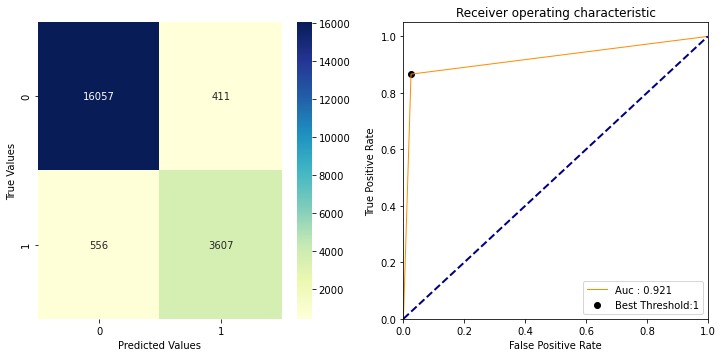

In [36]:
print('Training Data')
print_results(LC_model,X_train,Y_train['Label'],multi_class=False)

Test Data
Accuracy : 0.7169364691508857
Mean absolute error: 0.28306353084911423
              precision    recall  f1-score   support

           0       1.00      0.70      0.83     12550
           1       0.13      1.00      0.23       546

    accuracy                           0.72     13096
   macro avg       0.56      0.85      0.53     13096
weighted avg       0.96      0.72      0.80     13096

Area under curve :  0.8523107569721116 



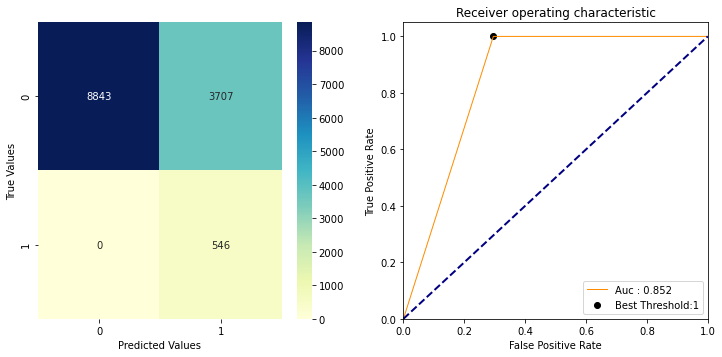

In [37]:
print('Test Data')
print_results(LC_model,X_test,Y_test['Label'],multi_class=False)

In [38]:
SVM_model=SVC(kernel='poly',C=1)
SVM_model.fit(X_train,Y_train['Label'])

SVC(C=1, kernel='poly')

Training Data
Accuracy : 0.9590422180214241
Mean absolute error: 0.04095778197857593
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16468
           1       0.93      0.86      0.89      4163

    accuracy                           0.96     20631
   macro avg       0.95      0.92      0.93     20631
weighted avg       0.96      0.96      0.96     20631

Area under curve :  0.9209466341553751 



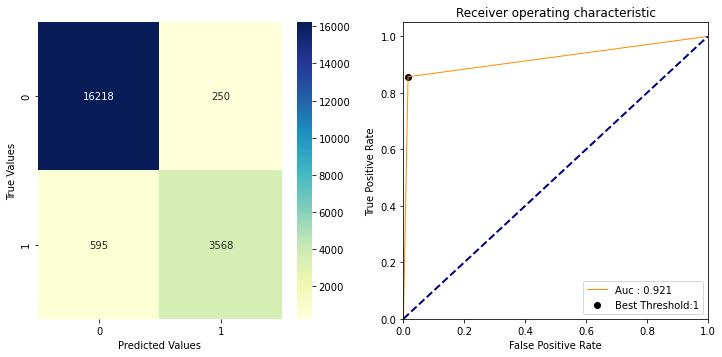

In [39]:
print('Training Data')
print_results(SVM_model,X_train,Y_train['Label'],multi_class=False)

Test Data
Accuracy : 0.7894777031154551
Mean absolute error: 0.2105222968845449
              precision    recall  f1-score   support

           0       1.00      0.78      0.88     12550
           1       0.16      1.00      0.28       546

    accuracy                           0.79     13096
   macro avg       0.58      0.89      0.58     13096
weighted avg       0.96      0.79      0.85     13096

Area under curve :  0.8884075419931994 



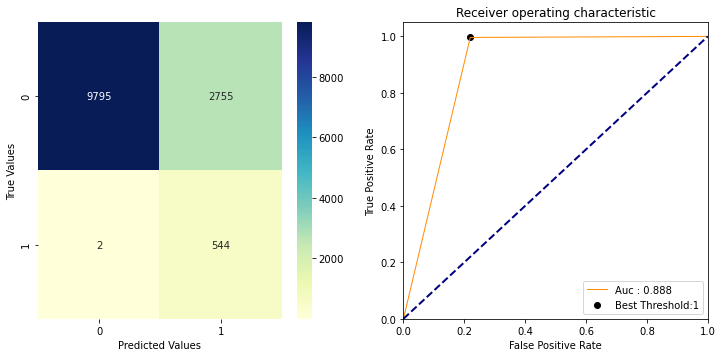

In [40]:
print('Test Data')
print_results(SVM_model,X_test,Y_test['Label'],multi_class=False)

In [41]:
RFC_model=RandomForestClassifier(n_estimators=500)
RFC_model.fit(X_train,Y_train['Label'])

RandomForestClassifier()

Training Data
Accuracy : 1.0
Mean absolute error: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16468
           1       1.00      1.00      1.00      4163

    accuracy                           1.00     20631
   macro avg       1.00      1.00      1.00     20631
weighted avg       1.00      1.00      1.00     20631

Area under curve :  1.0 



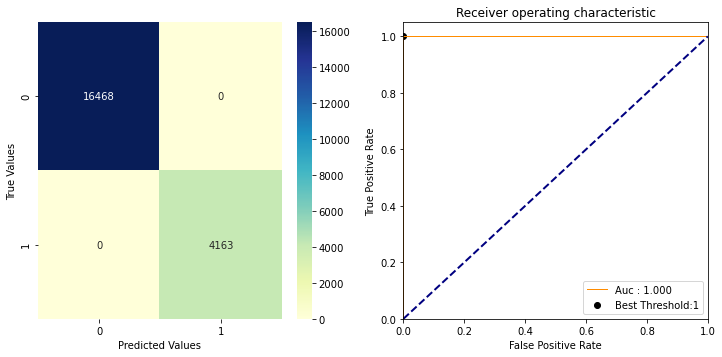

In [42]:
print('Training Data')
print_results(RFC_model,X_train,Y_train['Label'],multi_class=False)

Test Data
Accuracy : 0.8565974343310935
Mean absolute error: 0.14340256566890652
              precision    recall  f1-score   support

           0       1.00      0.85      0.92     12550
           1       0.22      0.98      0.36       546

    accuracy                           0.86     13096
   macro avg       0.61      0.92      0.64     13096
weighted avg       0.97      0.86      0.90     13096

Area under curve :  0.9172960903638194 



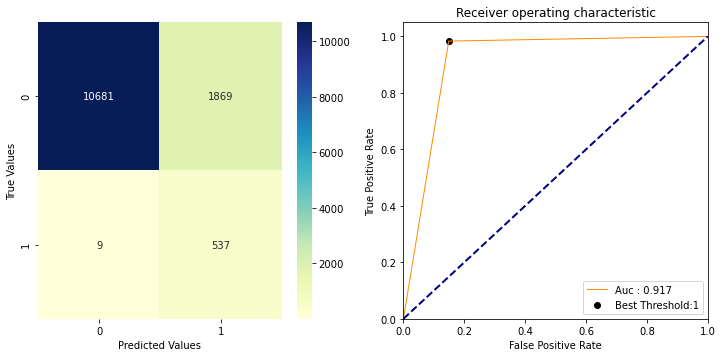

In [43]:
print('Test Data')
print_results(RFC_model,X_test,Y_test['Label'],multi_class=False)

In [44]:
KNN_model=KNeighborsClassifier(n_neighbors = 17)
KNN_model.fit(X_train,Y_train['Label'])

KNeighborsClassifier(n_neighbors=17)

Training Data
Accuracy : 0.9576365663322185
Mean absolute error: 0.042363433667781496
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     16468
           1       0.93      0.86      0.89      4163

    accuracy                           0.96     20631
   macro avg       0.95      0.92      0.93     20631
weighted avg       0.96      0.96      0.96     20631

Area under curve :  0.9199763948699436 



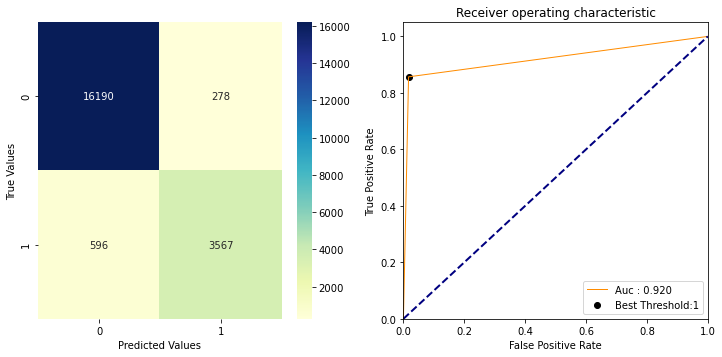

In [45]:
print('Training Data')
print_results(KNN_model,X_train,Y_train['Label'],multi_class=False)

Test Data
Accuracy : 0.8680513133781307
Mean absolute error: 0.13194868662186926
              precision    recall  f1-score   support

           0       1.00      0.86      0.93     12550
           1       0.24      1.00      0.39       546

    accuracy                           0.87     13096
   macro avg       0.62      0.93      0.66     13096
weighted avg       0.97      0.87      0.90     13096

Area under curve :  0.9294035579294544 



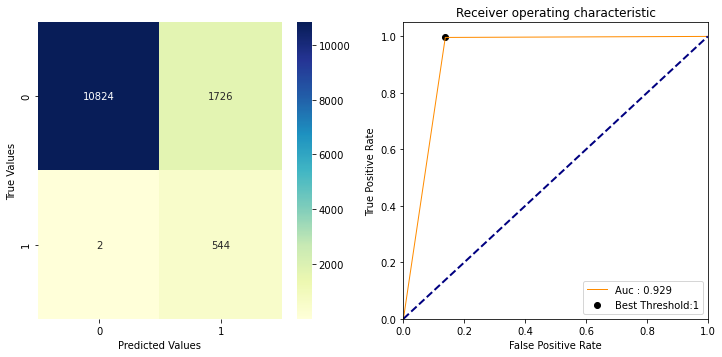

In [46]:
print('Test Data')
print_results(KNN_model,X_test,Y_test['Label'],multi_class=False)

In [47]:
Actual=Y_test['Label']
LC_pred=LC_model.predict(X_test)
SVM_pred=SVM_model.predict(X_test)
RFC_pred=RFC_model.predict(X_test)
KNN_pred=KNN_model.predict(X_test)

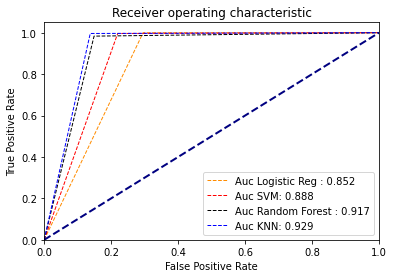

In [48]:
model_roc_auc_LC = roc_auc_score(Actual, LC_pred) 
model_roc_auc_SVM = roc_auc_score(Actual, SVM_pred) 
model_roc_auc_RFC = roc_auc_score(Actual, RFC_model.predict(X_test)) 
model_roc_auc_KNN = roc_auc_score(Actual, KNN_model.predict(X_test)) 

fpr_LC,tpr_LC,thresholds_LC = roc_curve(Actual, LC_pred)
fpr_SVM,tpr_SVM,thresholds_SVM = roc_curve(Actual, SVM_pred)
fpr_RFC,tpr_RFC,thresholds_RFC = roc_curve(Actual, RFC_pred)
fpr_KNN,tpr_KNN,thresholds_KNN = roc_curve(Actual, KNN_pred)

plt.plot(fpr_LC, tpr_LC, color='darkorange', lw=1, linestyle='--',label = "Auc Logistic Reg : %.3f" %model_roc_auc_LC)
plt.plot(fpr_SVM, tpr_SVM, color='red', lw=1, linestyle='--', label = "Auc SVM: %.3f" %model_roc_auc_SVM)
plt.plot(fpr_RFC, tpr_RFC, color='black', lw=1, linestyle='--', label = "Auc Random Forest : %.3f" %model_roc_auc_RFC)
plt.plot(fpr_KNN, tpr_KNN, color='blue', lw=1, linestyle='--', label = "Auc KNN: %.3f" %model_roc_auc_KNN)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('AUC_curves.png',bbox_inches ='tight')

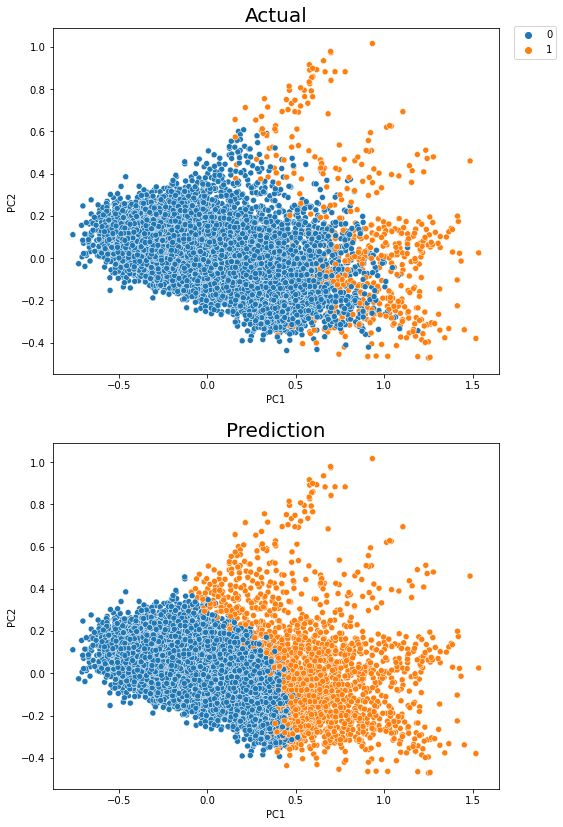

In [49]:
fig = plt.figure(figsize = (8,14))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
plt.subplot(211)
ax1=sns.scatterplot(data=test_scaled_PCA,x='PC1',y='PC2',hue=Y_test['Label'])
ax1.set_title('Actual', fontsize = 20)
ax1.legend(bbox_to_anchor=(1.14,1.02))
plt.subplot(212)
ax2=sns.scatterplot(data=test_scaled_PCA,x='PC1',y='PC2',hue=KNN_pred)
ax2.set_title('Prediction', fontsize = 20)
ax2.get_legend().remove()
ax.grid()
plt.savefig('KNN_prediction_test.png',bbox_inches ='tight')

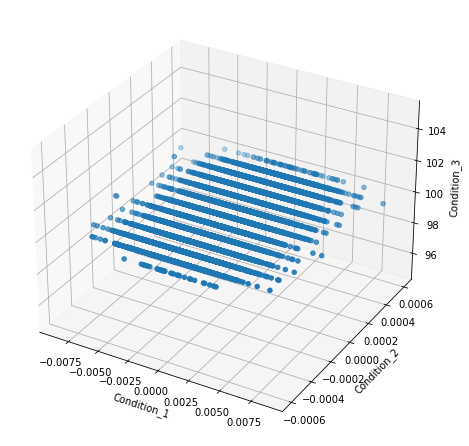

In [12]:
fig = plt.figure(figsize=(6,6))

ax = Axes3D(fig) # Method 1
# ax = fig.add_subplot(111, projection='3d') # Method 2




ax.scatter(xs=train.Condition_1, ys=train.Condition_2, zs=train.Condition_3, marker='o')
ax.set_xlabel('Condition_1')
ax.set_ylabel('Condition_2')
ax.set_zlabel('Condition_3')
plt.savefig('Observation of conditions.png',bbox_inches ='tight')
plt.show()